# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.073561e+01     7.356997e+00
 * time: 0.0026810169219970703
     1     2.815015e+01     4.518564e+00
 * time: 0.01191091537475586
     2     2.060338e+01     6.305400e+00
 * time: 0.023041963577270508
     3     1.498535e+01     5.706274e+00
 * time: 0.033998966217041016
     4     1.078376e+01     2.239246e+00
 * time: 0.04543495178222656
     5     1.043566e+01     2.940498e+00
 * time: 0.05470585823059082
     6     9.568998e+00     2.110068e+00
 * time: 0.0640408992767334
     7     8.906686e+00     1.341806e+00
 * time: 0.07329487800598145
     8     8.596651e+00     1.686341e+00
 * time: 0.08272194862365723
     9     8.444912e+00     1.393010e+00
 * time: 0.09226298332214355
    10     8.430079e+00     1.632741e+00
 * time: 0.09922289848327637
    11     8.387283e+00     1.055039e+00
 * time: 0.10615992546081543
    12     8.286799e+00     9.651704e-01
 * time: 0.11349701881408691
    13     8.206038e+00     1.011959e+00
 * ti

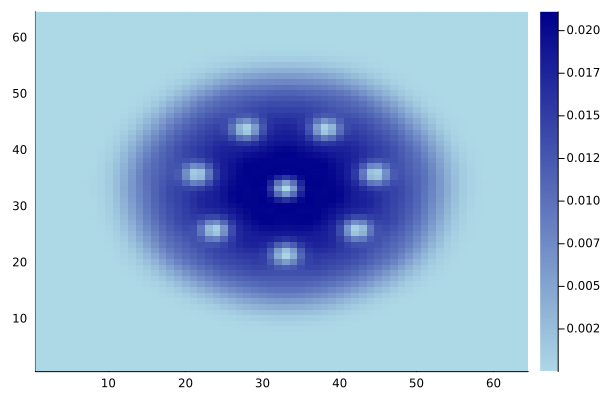

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)